# Data Understanding

We are going to determine factors that influence survival rate from Titanic Dataset. There are two dataset used here: the train and test dataset. Here is the description for the dataset's columns

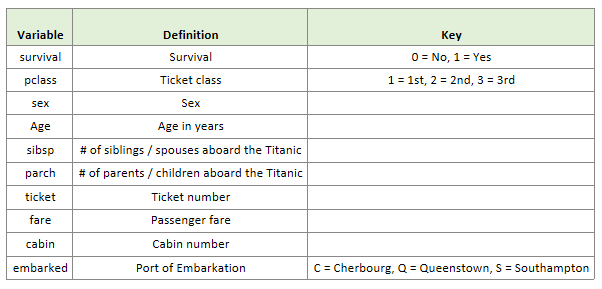

## Import Data

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

In [2]:
#Import Data
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
test2 = test.copy()
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Understanding

In [3]:
#Summary statistics for initial numerical variables
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Sumamry statistics for initial categorical variables
train.describe(include= 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
#Printing variable types and variables with missing values (seen by the number for non-null, 
#compared to the cumber of the row)
print(train.info())
print('*-'*25)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

For the train dataset, there are missing values for column Age, Cabin, and Embarked
For the test dataset, there are missing values for column Age, Fare, and Cabin

From the initial data nderstanding process we can conclude that the columns can be classified as follows:

*ORDINAL CATEGORICAL*
1. Pclass

*NOMINAL CATEGORICAL*
1. Sex
2. Embarked

*DISCRETE NUMERICAL*
1. PassengerId
2. SipSp
3. Parch

*CONTINUOUS NUMERICAL*
1. Age
2. Fare

Ticket and Cabin are Alphanumerical value


## Exploration with Data Visualization

([<matplotlib.patches.Wedge at 0x259d054b6d0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

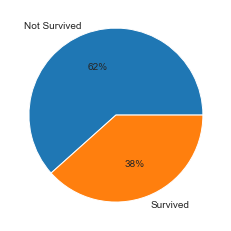

In [6]:
plt.pie(train.Survived.value_counts(normalize = True), autopct='%1.0f%%', labels = ['Not Survived', 'Survived'])

The proportion for 'Survived' values is not extreme, so oversampling or undersampling is not required. Now, we're going to visualize the rest of the columns, and the exploration will be seperated between the numeric and categorical column type.

### Numerical Columns

<Figure size 720x576 with 0 Axes>

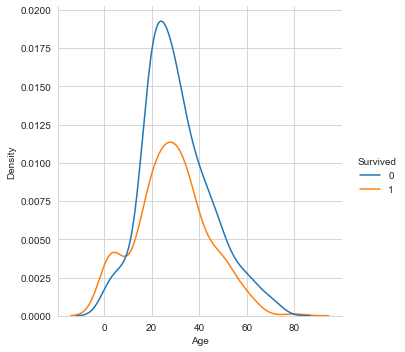

In [7]:
plt.figure(figsize = (10,8))
sns.displot(x= train.Age, hue = train['Survived'], kind = 'kde')

There is some 'hill' seen in the range of children age for survived data. It can be assumed that children are prioritised for the rescue

<Figure size 720x576 with 0 Axes>

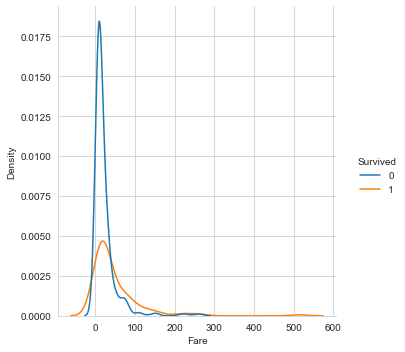

In [8]:
plt.figure(figsize = (10,8))
sns.displot(x= train.Fare, hue = train['Survived'], kind = 'kde')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

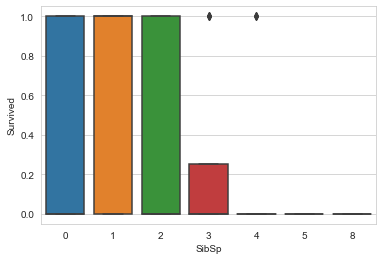

In [9]:
sns.boxplot(x= train.SibSp, y = train.Survived)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

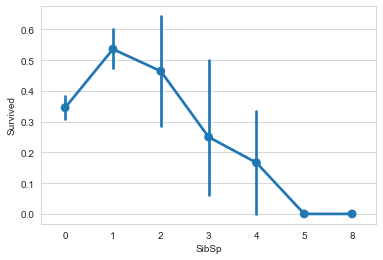

In [10]:
sns.pointplot(train.SibSp, train.Survived)

The higher number of siblings or spouses, the more likely for the person to not survive

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

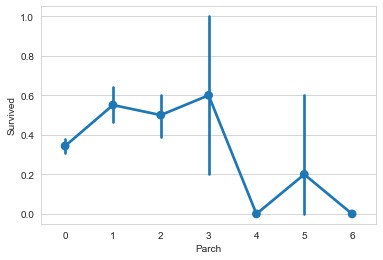

In [11]:
sns.pointplot(train.Parch, train.Survived)

Passenger with parent or children above 3 people is more likely to not survive

<Figure size 1440x1296 with 0 Axes>

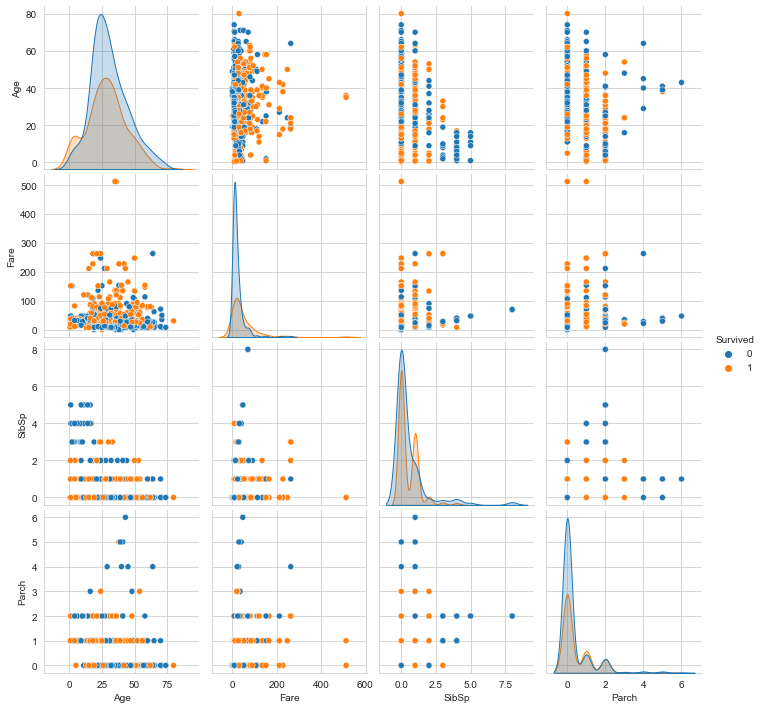

In [12]:
plt.figure(figsize = (20,18))
num = train[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']]
sns.pairplot(num, hue = 'Survived')

### Categorical Columns

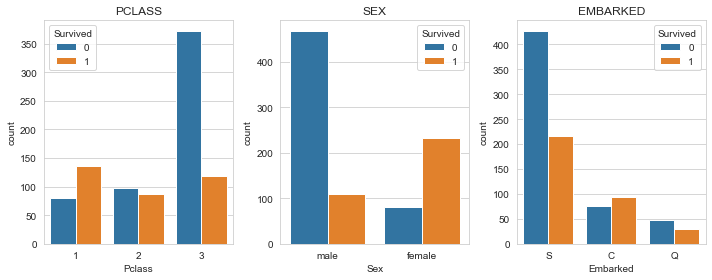

In [13]:
plt.figure(figsize = (10,4))
cat = ['Pclass', 'Sex', 'Embarked']
for item in train[cat].columns:
    plt.subplot(1,3, list(train[cat].columns).index(item)+1)
    sns.countplot(train[cat][item], hue = train.Survived)
    plt.title(str(item).upper())
plt.tight_layout()
plt.show()

<Figure size 576x720 with 0 Axes>

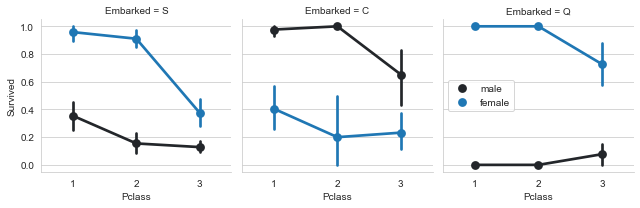

In [14]:
plt.figure(figsize = (8,10))
g = sns.FacetGrid(train, col = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
plt.legend()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

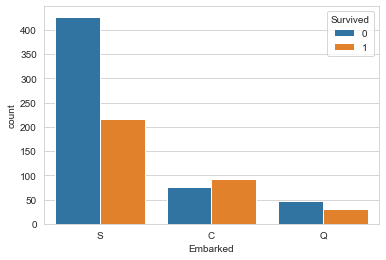

In [15]:
sns.countplot(train.Embarked, hue = train.Survived)

# Data Preparation

## Data Cleaning

### Duplicated Data

In [16]:
#Checking duplicates
print('train duplication: ' + str(train.duplicated().sum()))
print('test duplication: ' + str(test.duplicated().sum()))

train duplication: 0
test duplication: 0


There is no duplicated data

### Outlier

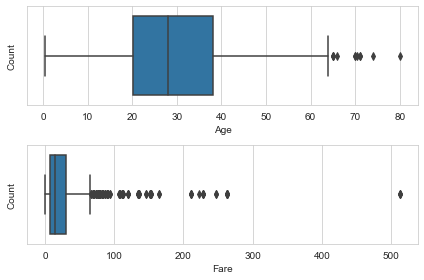

In [17]:
numeric = ['Age', 'Fare']
for item in train[numeric].columns:
    plt.subplot(2,1,list(train[numeric].columns).index(item)+1)
    sns.boxplot(train[numeric][item])
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age'>

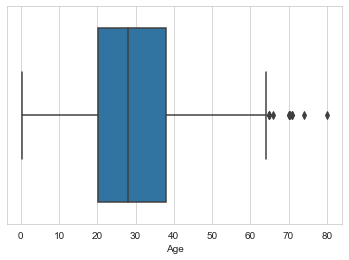

In [18]:
sns.boxplot(train.Age)

The point as seen in boxplots cannot be considered as outliers since there are no additional data that support the stetment that those data are ouliers, hence no outliers are removed

### Missing Data

In [19]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0, 0.5, 'Percentage Missing')

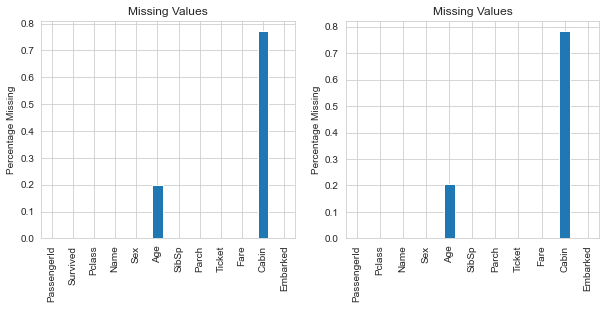

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
(train.isna().sum()/train.shape[0]).plot(kind='bar')
plt.title('Missing Values')
plt.ylabel('Percentage Missing')

plt.subplot(1,2,2)
(test.isna().sum()/test.shape[0]).plot(kind='bar')
plt.title('Missing Values')
plt.ylabel('Percentage Missing')

In [21]:
# replacing missing value with column's median
# median is used to remove the effect of outlier

test['Fare'].fillna(test.Fare.median(), inplace = True)

In [22]:
# replacing missing value with column's most frequent data

print(train.Embarked.value_counts())
train['Embarked'].fillna('S', inplace = True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [23]:
# Age will be filled with a model

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
train['Age'] = mice_imputer.fit_transform(train[['Age']])
test['Age'] = mice_imputer.fit_transform(test[['Age']])

In [24]:
combine = [train, test]
for data in combine:
    data.drop('Cabin', axis = 1, inplace = True)

## Data Transformation

In [25]:
# Encoding sex data
for data in combine:
    data.Sex = np.where(data.Sex.str.contains('female'),1,0)

train.Sex.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int32

In [26]:
# Create new numerical column that can describe other columns
for data in combine:
    data['family_size'] = data.SibSp + data.Parch + 1
    data['Alone'] = np.where(data.family_size == 1, 1, 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1


In [27]:
# Create title column by splitting the name
#TITLE = split berdasarkan (.), ngambil yg pertama, split berdasarkan (,) ngambil yg kedua (si titlenya)

for data in combine:
    data['title'] = [i.split('.')[0].split(',')[1].strip() for i in data.Name]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Alone,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,1,Mr


In [28]:
train.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [29]:
test.title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: title, dtype: int64

In [30]:
# Replacing least frequent title with 'others' and replace similar titles
for data in combine:
    data['title'] = data['title'].replace('Mlle', 'Miss')
    data['title'] = data['title'].replace('Ms', 'Miss')
    data['title'] = data['title'].replace('Mme', 'Mrs')
    data['title'] = data['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Capt', 'the Countess', 'Sir', 'Jonkheer', 'Don', 'Dona'], 'Other')
train.title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: title, dtype: int64

In [31]:
# Encoding age into categorical column
for data in combine:    
    data.loc[ data['Age'] <= 16, 'Age'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 2
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 3
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 4
    data.loc[ data['Age'] > 64, 'Age'] = 5
    data['Age'] = data.Age.astype('int')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Alone,title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,S,1,1,Mr


In [32]:
# Define the range for the categorical naming
pd.qcut(train['Fare'], 4).unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [33]:
# Encoding fare into categorical column
for data in combine:    
    data.loc[data['Fare'] <= 7.91, 'Fare'] =1
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 2
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare'] = 3
    data.loc[data['Fare'] > 31, 'Fare'] = 4
    data['Fare'] = data.Fare.astype('int')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Alone,title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,1,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,4,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,2,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,4,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,2,S,1,1,Mr


In [34]:
# Delete useless columns
delete_col = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket']
for data in combine:
    data.drop(delete_col, axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,Alone,title
0,0,3,0,2,1,S,2,0,Mr
1,1,1,1,3,4,C,2,0,Mrs
2,1,3,1,2,2,S,1,1,Miss
3,1,1,1,3,4,S,2,0,Mrs
4,0,3,0,3,2,S,1,1,Mr


In [35]:
# Create dummy columns for the nominal categorical columns
train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True)

train.head()

,Survived,Pclass,Sex,Age,Fare,family_size,Alone,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Other
0,0,3,0,2,1,2,0,0,1,0,1,0,0
1,1,1,1,3,4,2,0,0,0,0,0,1,0
2,1,3,1,2,2,1,1,0,1,1,0,0,0
3,1,1,1,3,4,2,0,0,1,0,0,1,0
4,0,3,0,3,2,1,1,0,1,0,1,0,0


## Data Splitting

The data is splitted to satisfy the supervised process in machine learning. The train dataset will be used to build the model and the test dataset will be used to validate the model.

In [36]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0, stratify = y)

# Modelling

We are going to use 7 models to classify the data. The followings are the models that will be used as well as the validation process to figure out which model can classify the best

In [37]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

KFold_Score = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
               'RandomForestClassifier', 'AdaBoostClassifier', 
               'KNeighborsClassifier','GradientBoostingClassifier']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    KFold_Score[classifiers[j]] = (cross_val_score(model, X_train, np.ravel(y_train), scoring = 'accuracy', cv=cv))
    j = j+1

In [38]:
mean = pd.DataFrame(KFold_Score.mean(), index= classifiers)
KFold_Score = pd.concat([KFold_Score,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
Radial SVM,0.858209,0.783582,0.858209,0.864662,0.812030,0.835338
Linear SVM,0.850746,0.783582,0.843284,0.872180,0.804511,0.830861
KNeighborsClassifier,0.850746,0.776119,0.858209,0.819549,0.834586,0.827842
LogisticRegression,0.828358,0.753731,0.843284,0.872180,0.812030,0.821917
RandomForestClassifier,0.843284,0.768657,0.835821,0.827068,0.796992,0.814364
AdaBoostClassifier,0.813433,0.746269,0.835821,0.872180,0.789474,0.811435
GradientBoostingClassifier,0.835821,0.791045,0.835821,0.804511,0.789474,0.811334


We are going to use accuracy as our evaluation metric since since there is no significant downside of predicting false negative. As we can see, Radial SVM has the highest mean for accuracy, hence making this model as the best model for classifying the survived or not survived passender

# Prediction

After figuring out the best model to classify the data, we are going to predict the test data and submit it to kaggle

In [40]:
model_svm_final = svm.SVC(kernel='rbf')
model_svm_final.fit(X_train, y_train)
prediction = model_svm_final.predict(test)

To determine which factor influence the classification decision the most, we are going to use permutation importance

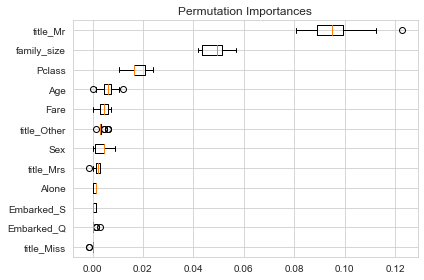

In [42]:
from sklearn.inspection import permutation_importance


result = permutation_importance(model_svm_final, X_train, y_train, n_repeats=20,
                                random_state=15, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

It can be seen that Title, family size, and Pclass are three most important factor than influence the survival status

In [41]:
finale = pd.Series(prediction, name = 'Survived').to_frame()
finale['PassengerId'] = test2['PassengerId'].copy()
finale = finale.set_index('PassengerId')
finale

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


Accuracy after submitting = 78%

In [ ]:
#Download File
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link(df, title = "Download CSV file", filename = "titanic_prediction_result.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(finale)